In [3]:
import pandas as pd
df=pd.read_csv("PlayTennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlook_n']=le.fit_transform(df['Outlook'])
df['Temperature_n']=le.fit_transform(df['Temperature'])
df['Humidity_n']=le.fit_transform(df['Humidity'])
df['Wind_n']=le.fit_transform(df['Wind'])
df['Play Tennis_n']=le.fit_transform(df['Play Tennis'])
df.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis,Outlook_n,Temperature_n,Humidity_n,Wind_n,Play Tennis_n
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1


In [5]:

X=df.drop(['Play Tennis_n','Outlook','Temperature','Humidity','Wind','Play Tennis'],axis='columns')
y=df['Play Tennis_n']
X

,Outlook_n,Temperature_n,Humidity_n,Wind_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [8]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[0, 1],
       [0, 4]], dtype=int64)

In [117]:
#linear regression

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df=pd.read_csv('hp.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


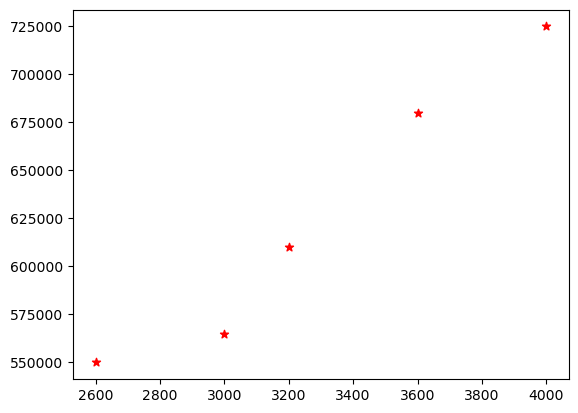

In [253]:
plt.scatter(df.area,df.price,color="red",marker="*")

In [254]:
model=linear_model.LinearRegression()
model.fit(df[['area']],df.price)
model.predict([[100]])

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([194195.20547945])

Text(0, 0.5, 'price')

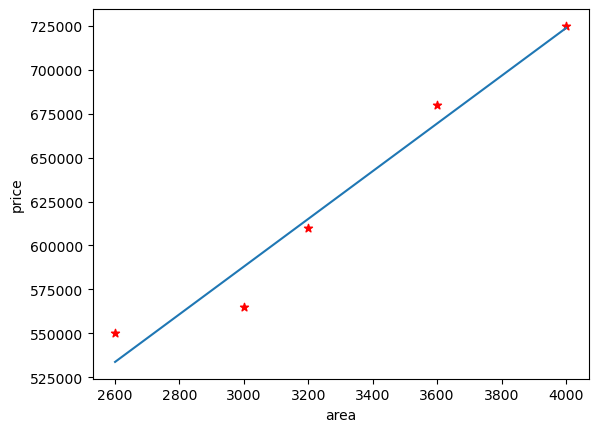

In [256]:
plt.scatter(df.area,df.price,color="red",marker="*")
plt.plot(df.area,model.predict(df[['area']]))
plt.xlabel('area')
plt.ylabel('price')

In [ ]:
#decision tree program

In [10]:
import pandas as pd
df=pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [12]:
inputs=df.drop(['salary_more_then_100k'],axis='columns')
target=df['salary_more_then_100k']


In [262]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
inputs['company_n']=le.fit_transform(df['company'])
inputs['job_n']=le.fit_transform(df['job'])
inputs['degree_n']=le.fit_transform(df['degree'])
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [263]:
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth=100)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.3,random_state=42)

In [264]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=100)

In [265]:
y_pred=model.predict(x_test)

In [266]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8


In [267]:
#SVM

In [271]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [272]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [273]:
inputs=df.drop(['target'],axis='columns')
target=df['target']

In [274]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(inputs,target,test_size=0.2)

In [275]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [276]:
y_pred=model.predict(x_test)

In [277]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.9666666666666667


In [278]:
model.score(x_test,y_test)

0.9666666666666667

In [279]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [ ]:
#NAIVE BAYESIAN CLASSIFIER

In [280]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [281]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
inputs=df
target=iris.target

In [282]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.4)

In [290]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [291]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.9666666666666667

In [292]:
from sklearn.metrics import accuracy_score
print("ACCURACY SCORE =",int(accuracy_score(y_test,y_pred)*100),"%")

ACCURACY SCORE = 96 %


In [293]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[21  0  0]
 [ 0 19  1]
 [ 0  1 18]]


In [ ]:
#knn allgorithm

In [294]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [296]:
inputs=df
target=iris.target

In [310]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [312]:
y_pred=knn.predict(x_test)
knn.score(x_test,y_test)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

0.9333333333333333

In [ ]:
# PCA


In [315]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig

data = pd.read_csv('data.csv')
df=data.iloc[0:5]
x = StandardScaler().fit_transform(df)
df=pd.DataFrame(x)

co=df.cov()
m1=df[0].mean()
m2=df[1].mean()
m3=df[2].mean()
m4=df[3].mean()
print("The Covariance Matrix:")
print(df.cov())
values, vectors = eig(df.cov())
a=df[0]
b=df[1]
c=df[2]
d=df[3]

print("Eigen Values:",values)
print("Eigen Vectors:\n",vectors)
vectors.sort()
e1=vectors[1].transpose()

y=[]
for i in range(len(df[0])):
	l=[a[i]-m1,b[i]-m2,c[i]-m3,d[i]-m4]
	res=e1.dot(l)
	y.append(res)
print("The Reduced are: ")
print(y)

The Covariance Matrix:
          0         1         2         3
0  1.250000 -0.346195 -0.973066  0.596279
1 -0.346195  1.250000  0.154945  0.867810
2 -0.973066  0.154945  1.250000 -0.696250
3  0.596279  0.867810 -0.696250  1.250000
Eigen Values: [2.79130306 1.93780125 0.26793979 0.0029559 ]
Eigen Vectors:
 [[ 0.56305703 -0.35894593 -0.65520455 -0.35331515]
 [ 0.12840686  0.78788032  0.00349423 -0.60228238]
 [-0.59504692  0.24185241 -0.74372494  0.18520201]
 [ 0.55892542  0.43807513 -0.13254432  0.69146551]]
The Reduced are: 
[-0.3252129539684321, 0.6255393139019538, -1.1022198888845285, -0.21830642428760982, 1.0201999532386163]


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('data.csv')
df=data.iloc[0:5]


In [14]:
sc=StandardScaler()
x=sc.fit_transform(df)
df=pd.DataFrame(x)
df

,0,1,2,3
0,0.816497,-0.226134,-1.062184,0.385503
1,0.816497,1.092979,-0.102379,1.429948
2,0.816497,-1.545246,-0.742249,-0.646988
3,-1.224745,-0.414578,1.817230,-1.507646
4,-1.224745,1.092979,0.089582,0.339183


In [15]:
co=df.cov()
m1=df[0].mean()
m2=df[1].mean()
m3=df[2].mean()
m4=df[3].mean()


In [16]:
from numpy.linalg import eig
values,vectors=eig(df.cov())
vectors.sort()

In [17]:
a=df[0]
b=df[1]
c=df[2]
d=df[3]

In [19]:
e1=vectors[1].transpose()
y=[]
for i in range(len(df[0])):
    l=(a[i]-m1,b[i]-m2,c[i]-m3,d[i]-m4)
    res=e1.dot(l)
    y.append(res)
print(y)

[-0.3252129539684321, 0.6255393139019538, -1.1022198888845285, -0.21830642428760982, 1.0201999532386163]
